In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from torchvision import datasets, transforms

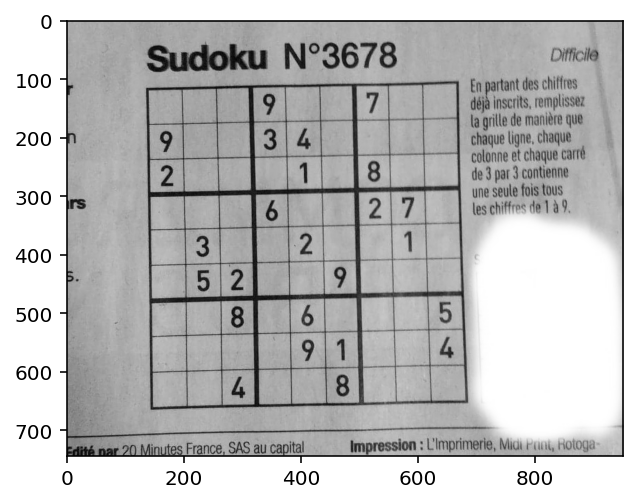

In [2]:
# get grayscale image

data_dir = 'images_test'
transform = transforms.Compose([transforms.Grayscale(1),
transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
#images, labels = next(iter(dataloader))
#helper.imshow(images[0], normalize=False)
#plt.imshow(images[0])

dataiter = iter(dataloader)
images = dataiter.next()

def imshow(img):
    #img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
# print(images[0])
imshow(torchvision.utils.make_grid(images[0]))